In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Loading in the Dataset (Preprocess)

In [9]:
df = pd.read_csv('data/cleaned_merged_seasons.csv', index_col=0)
df = df.sort_values(['name', 'season_x', 'GW']).set_index(['total_points', 'name'], drop = True).groupby('name', as_index=False).shift().dropna(subset = ['season_x']).reset_index()

# Exploratory Data Analysis

Let's analyze the features to see which ones are categorical versus which ones are numerical

In [83]:
# Find which features are numerical vs. categorical for EDA

num_vars = []
cat_vars = []
num_cat_vars = []

for column in list(df.columns): 
    
    if(df[column].dtype == 'float64' and len(df[column].unique())>=10): 
        num_vars.append(column)
    elif(df[column].dtype == 'float64'): 
        num_cat_vars.append(column)
    else: 
        cat_vars.append(column)
        
    print("{} has {} unique values of type {}".format(column, len(df[column].unique()), df[column].dtype))

cat_vars.remove('total_points')

total_points has 31 unique values of type int64
name has 982 unique values of type object
season_x has 6 unique values of type object
position has 4 unique values of type object
team_x has 24 unique values of type object
assists has 5 unique values of type float64
bonus has 4 unique values of type float64
bps has 113 unique values of type float64
clean_sheets has 2 unique values of type float64
creativity has 860 unique values of type float64
element has 734 unique values of type float64
fixture has 380 unique values of type float64
goals_conceded has 10 unique values of type float64
goals_scored has 5 unique values of type float64
ict_index has 273 unique values of type float64
influence has 528 unique values of type float64
kickoff_time has 1428 unique values of type object
minutes has 91 unique values of type float64
opponent_team has 20 unique values of type float64
opp_team_name has 31 unique values of type object
own_goals has 2 unique values of type float64
penalties_missed has 

Examining the distribution for numerical features, numerical features with a small number of categories, and categorical features  ... 

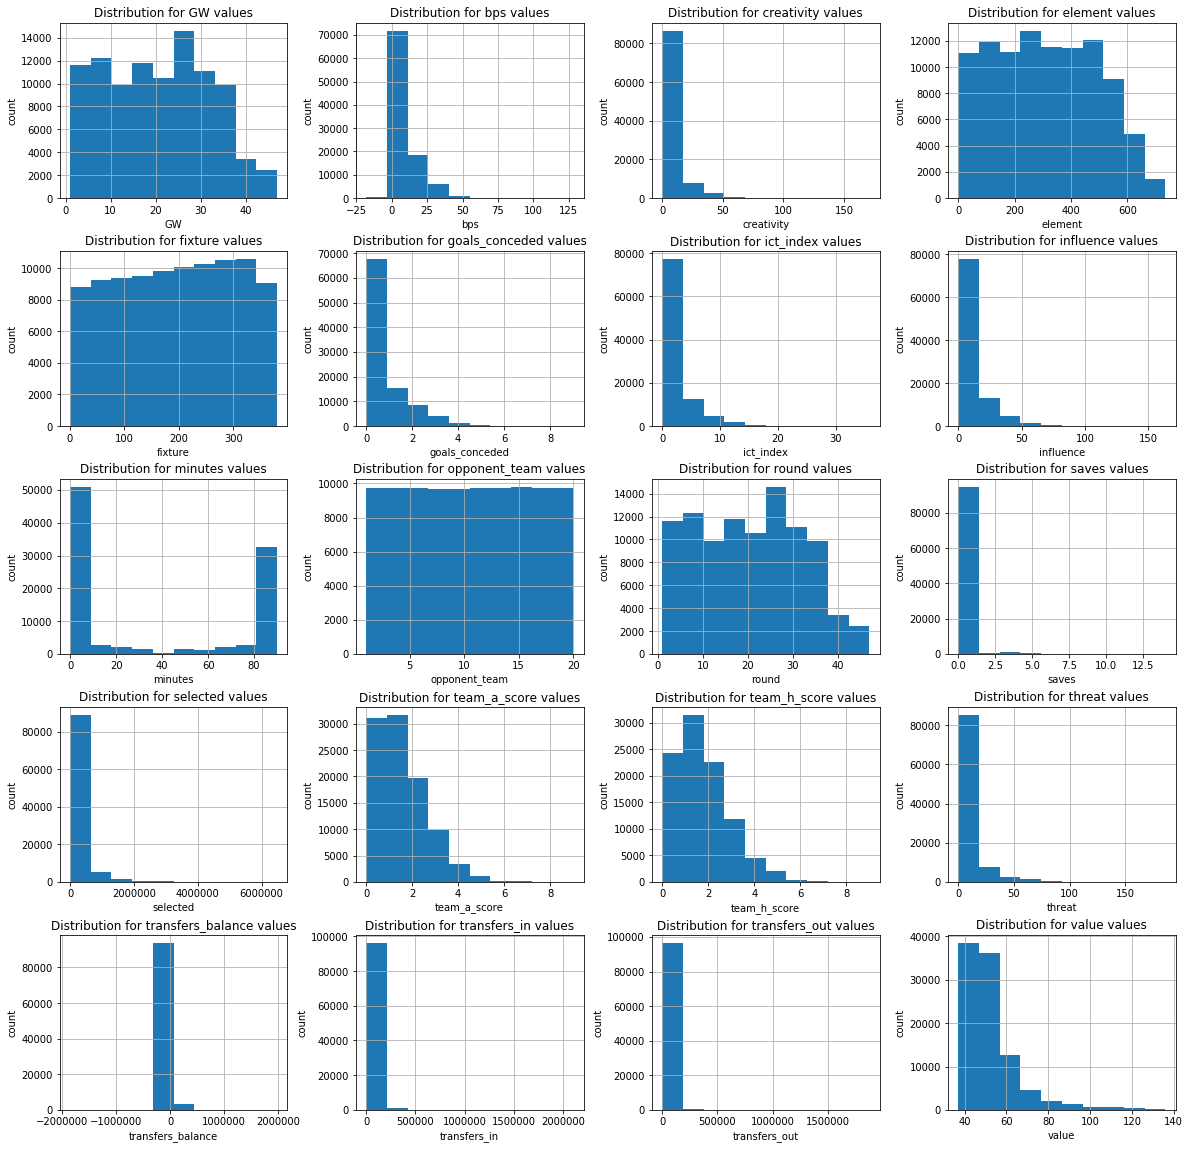

In [74]:
# Examine the distribution for numerical features (floats with 10+ unique values)

hist = df.hist(column=num_vars, layout=(5, 4), figsize=(20,20))
for ax, column_name in zip(hist.flatten(), sorted(num_vars)):
    ax.set_title("Distribution for {} values".format(column_name))
    ax.set_xlabel(column_name)
    ax.set_ylabel('count')

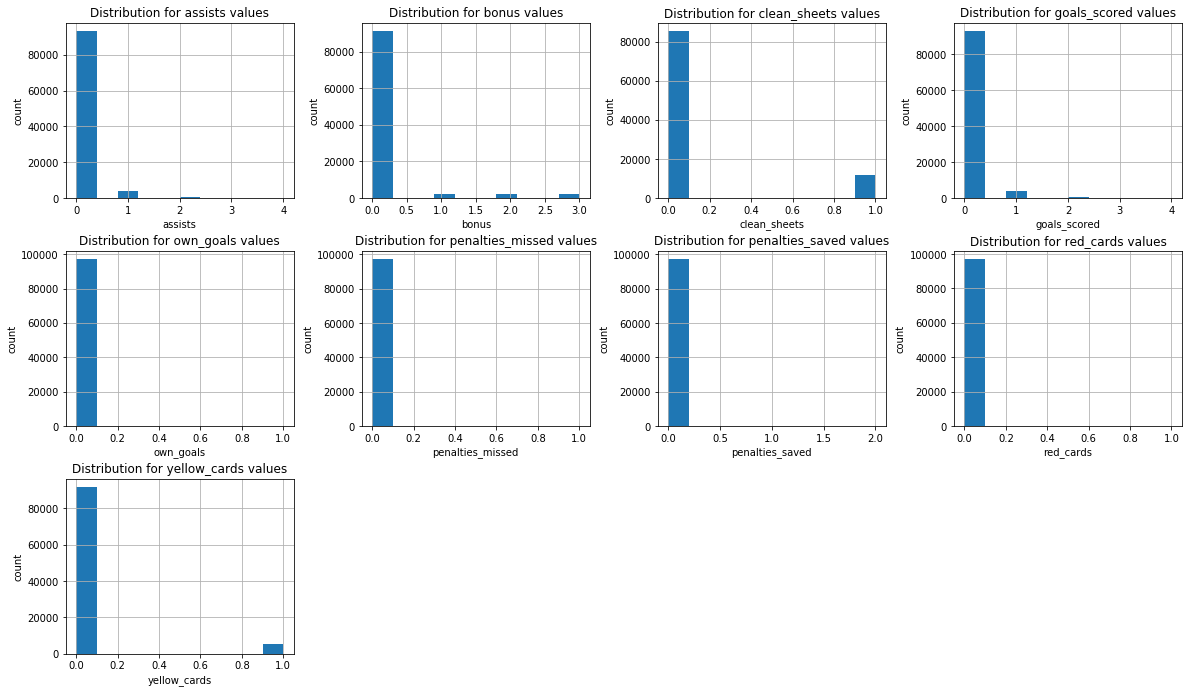

In [90]:
# Examine the distribution for numerical categorical features (floats with <10 unique values)

hist = df.hist(column=num_cat_vars, layout=(5, 4), figsize=(20,20))
for ax, column_name in zip(hist.flatten(), sorted(num_cat_vars)):
    ax.set_title("Distribution for {} values".format(column_name))
    ax.set_xlabel(column_name)
    ax.set_ylabel('count')

In [ ]:
# Drop these as they are not categorical features we want to consider (just got included beacuse they are not floats)

for feature in ['name', 'season_x', 'kickoff_time']: 
    cat_vars.remove(feature)

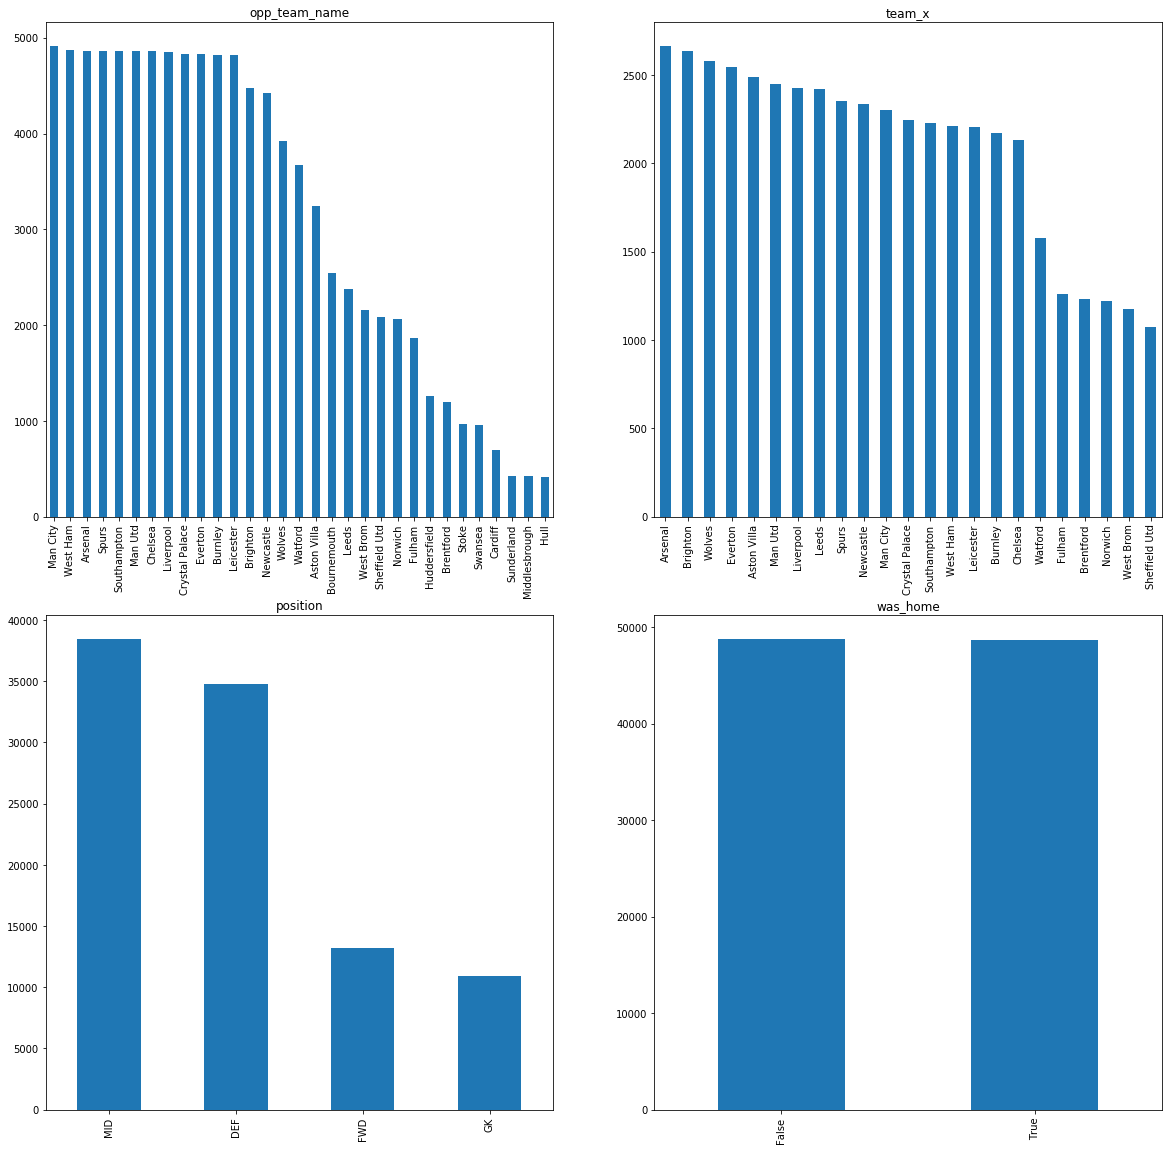

In [104]:
# Examine the distribution for categorical features (non float datatypes that aren't any of the above)

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(20,20))

for index, feature in enumerate(sorted(cat_vars)): 
    df[feature].value_counts().plot(ax=axes[index%2,index//2], subplots=True, kind='bar')

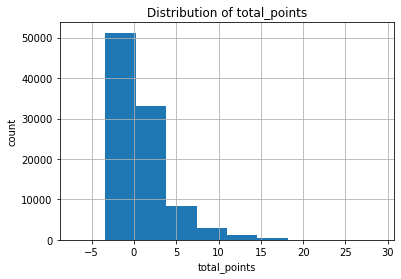

In [25]:
# Examine the distribution of y-labels

df.hist(column='total_points')
plt.title('Distribution of total_points')
plt.xlabel('total_points')
plt.ylabel('count')
plt.show()

Let's look at the correlation between features and target ...

In [106]:
df_x = df.drop(columns=['total_points'])
df_y = df['total_points']

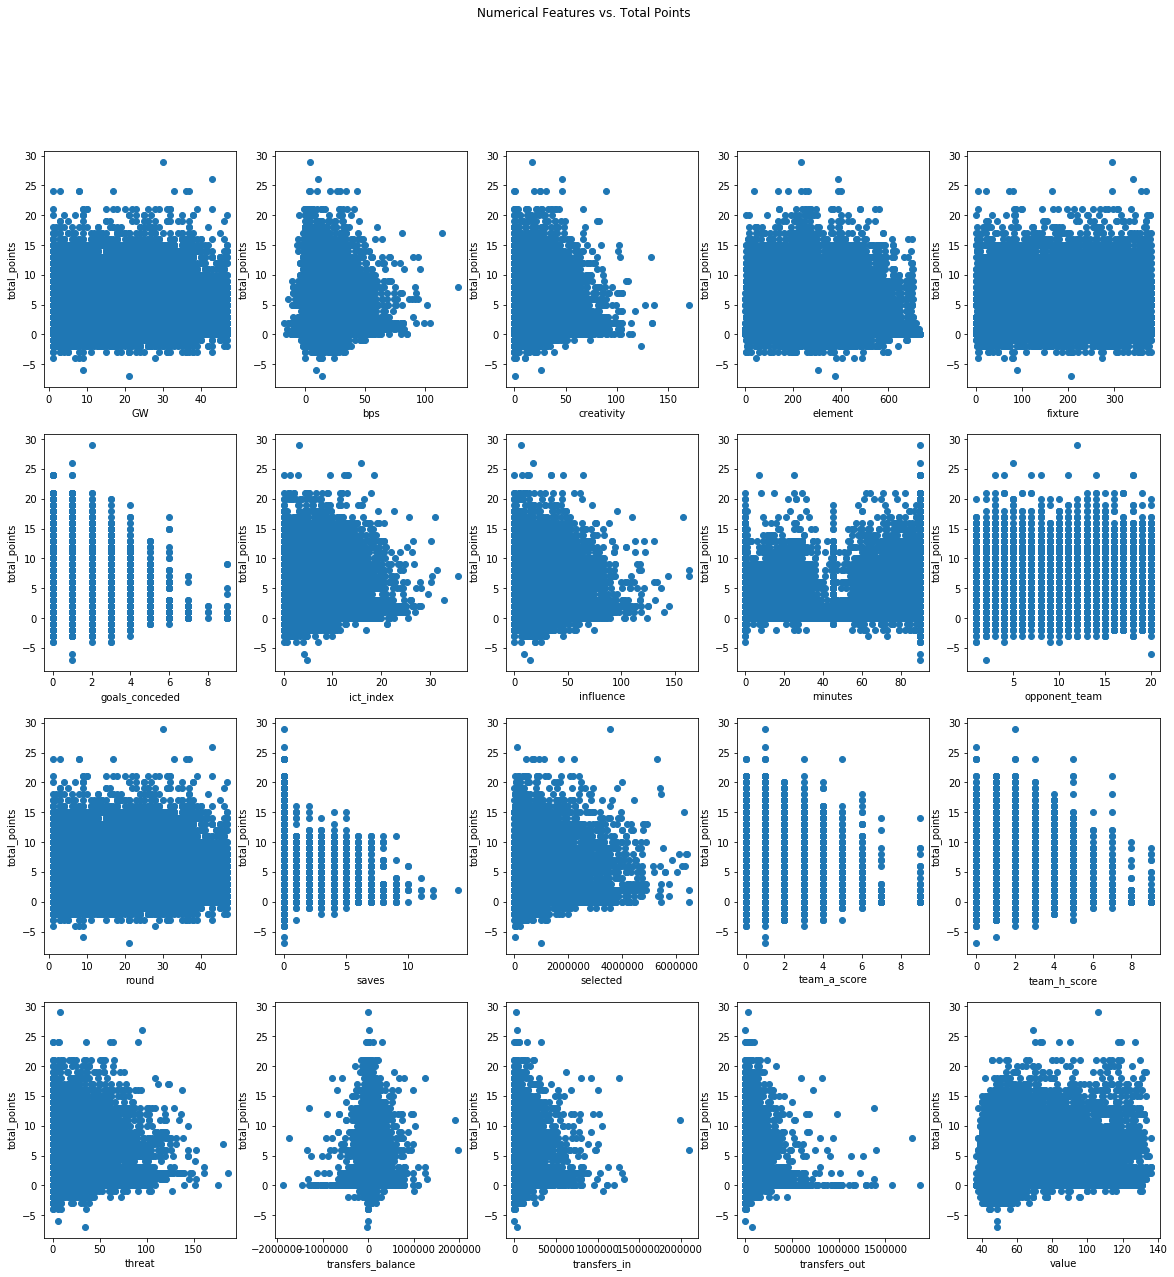

In [116]:
# Examine the correlation with the target for numerical features (floats with 10+ unique values)

fig, axes = plt.subplots(4, 5, figsize=(20,20))
fig.suptitle('Numerical Features vs. Total Points')

for index, feature in enumerate(sorted(num_vars)): 
    x_subplot = index//5
    y_subplot = index%5
    axes[x_subplot, y_subplot].scatter(df_x[feature], df_y)
    axes[x_subplot, y_subplot].set_xlabel(feature)
    axes[x_subplot, y_subplot].set_ylabel('total_points')

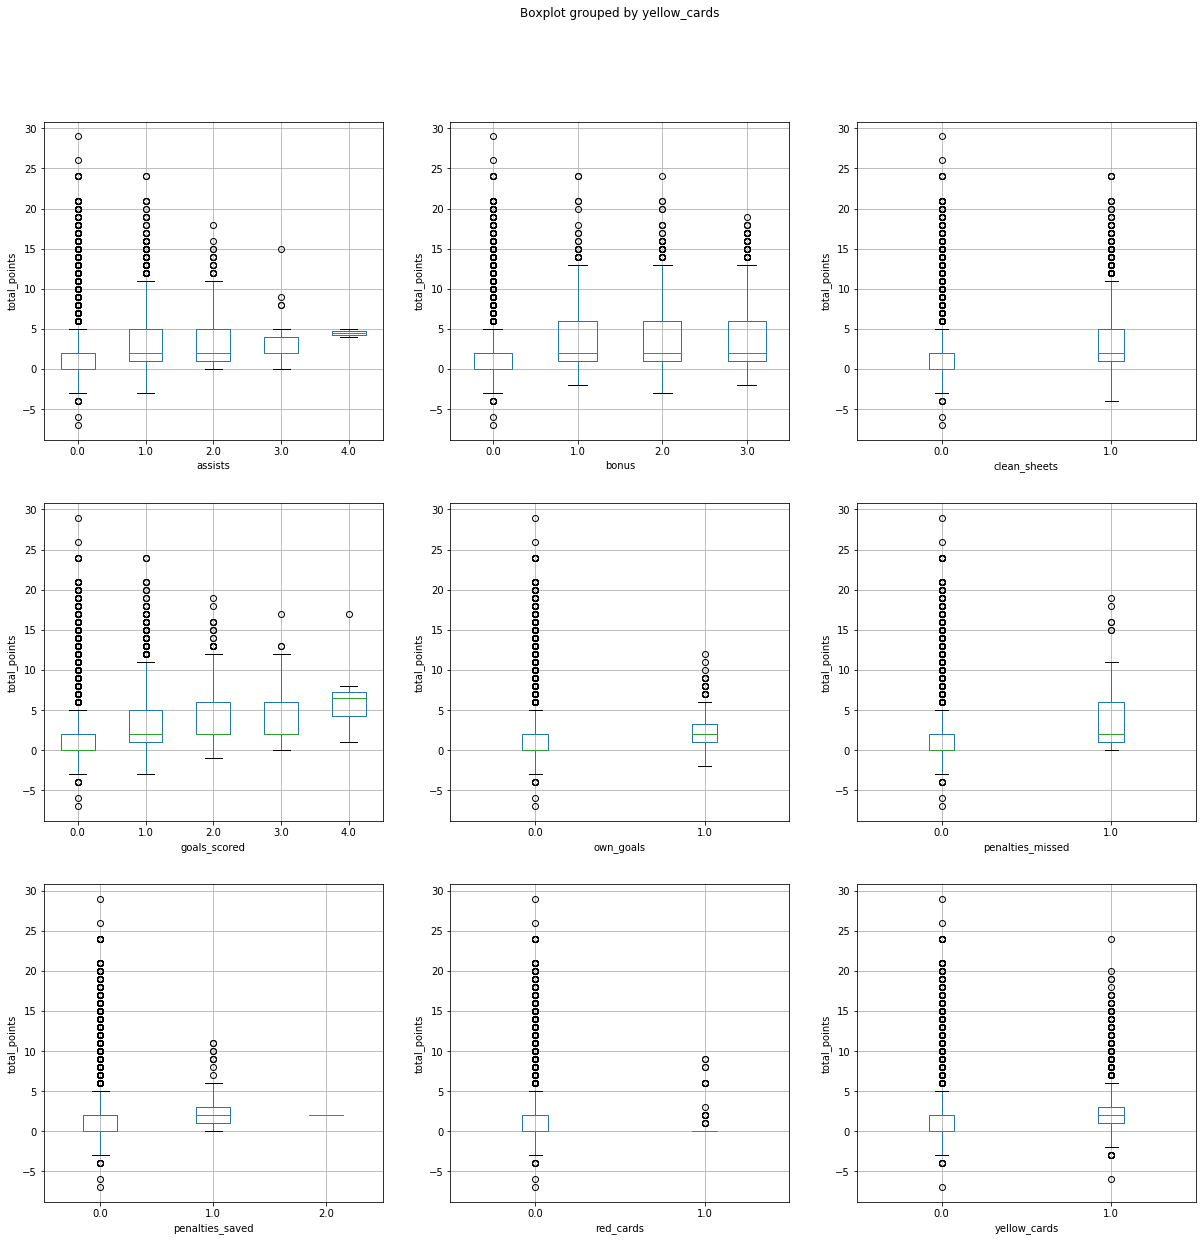

In [122]:
# Examine the correlation with the target for numerical categorical features (floats with <10 unique values)

fig, axes = plt.subplots(3, 3, figsize=(20,20))

for index, feature in enumerate(sorted(num_cat_vars)): 
    x_subplot = index//3
    y_subplot = index%3
    boxplt = df.boxplot(column=['total_points'], by=[feature], ax=axes[x_subplot, y_subplot])
    boxplt.set_xlabel(feature)
    boxplt.set_ylabel('total_points')
    boxplt.set_title('')

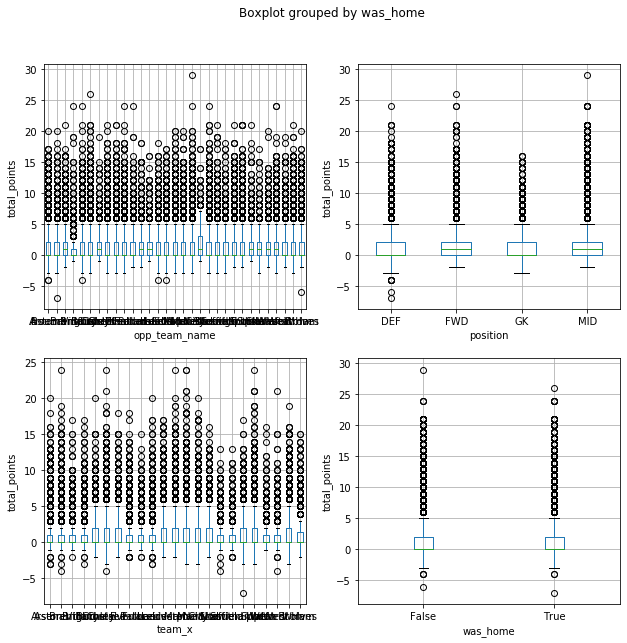

In [125]:
# Examine the correlation with the target for categorical features

fig, axes = plt.subplots(2, 2, figsize=(10,10))

for index, feature in enumerate(sorted(cat_vars)): 
    x_subplot = index//2
    y_subplot = index%2
    boxplt = df.boxplot(column=['total_points'], by=[feature], ax=axes[x_subplot, y_subplot])
    boxplt.set_xlabel(feature)
    boxplt.set_ylabel('total_points')
    boxplt.set_title('')

Let's look at highly correlated features

In [128]:
corr_matrix = df_x.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW
assists,1.000000,0.304041,0.398176,0.128119,0.397368,-0.041086,-0.010267,0.092566,0.115453,0.407686,0.373167,0.211019,0.006170,0.005988,0.014919,-0.005675,0.002677,-0.010494,-0.030982,0.145866,0.074059,0.085397,0.245588,0.053979,0.124639,0.072712,0.195012,0.045286,-0.010494
bonus,0.304041,1.000000,0.649463,0.280693,0.299430,-0.050917,-0.008618,0.031050,0.614866,0.536415,0.624663,0.280469,0.003854,-0.004406,0.012245,0.103948,-0.008589,-0.009053,0.107650,0.180645,-0.002755,-0.000088,0.372523,0.068262,0.147611,0.080185,0.188857,0.020362,-0.009053
bps,0.398176,0.649463,1.000000,0.506732,0.517097,-0.132964,-0.027732,0.325890,0.576283,0.775060,0.901690,0.748219,0.005895,0.004012,0.004001,0.077467,-0.033039,-0.027876,0.229433,0.298664,0.016608,0.044742,0.471809,0.111397,0.226223,0.113618,0.241175,0.112546,-0.027876
clean_sheets,0.128119,0.280693,0.506732,1.000000,0.278300,-0.081944,-0.008962,-0.203471,0.126210,0.344953,0.327604,0.447744,0.003448,-0.015294,0.014944,0.008033,-0.003178,-0.006324,0.064830,0.185112,-0.173763,-0.133324,0.241958,0.084472,0.151608,0.062717,0.162936,0.097405,-0.006324
creativity,0.397368,0.299430,0.517097,0.278300,1.000000,-0.104529,-0.023947,0.256178,0.218418,0.764451,0.491663,0.513158,0.002507,0.005241,0.042256,-0.012769,0.005176,-0.024906,-0.074546,0.264039,0.006039,0.022865,0.455812,0.108318,0.237713,0.131331,0.347541,0.135163,-0.024906
element,-0.041086,-0.050917,-0.132964,-0.081944,-0.104529,1.000000,0.108111,-0.092699,-0.045035,-0.128834,-0.123976,-0.163238,-0.026050,-0.007579,-0.012198,-0.002355,-0.008181,0.100872,-0.026181,-0.131993,0.000280,-0.005175,-0.088606,0.007950,-0.055968,-0.076668,-0.173234,-0.046289,0.100872
fixture,-0.010267,-0.008618,-0.027732,-0.008962,-0.023947,0.108111,1.000000,-0.034294,-0.010036,-0.028938,-0.029836,-0.041070,0.009686,-0.004300,-0.002519,0.000365,-0.008981,0.977056,-0.009431,0.005855,-0.024320,-0.003174,-0.017650,0.013288,-0.047119,-0.073548,-0.052917,-0.020842,0.977056
goals_conceded,0.092566,0.031050,0.325890,-0.203471,0.256178,-0.092699,-0.034294,1.000000,0.099200,0.348883,0.383188,0.604167,-0.007915,0.072226,0.019637,0.031537,0.059726,-0.034014,0.156895,0.147711,0.197973,0.221877,0.216811,0.040900,0.110073,0.073478,0.094410,0.176473,-0.034014
goals_scored,0.115453,0.614866,0.576283,0.126210,0.218418,-0.045035,-0.010036,0.099200,1.000000,0.620354,0.681025,0.219669,0.003569,0.002607,0.047853,-0.005827,-0.000337,-0.010366,-0.034364,0.185758,0.076065,0.087086,0.569485,0.070076,0.168196,0.101905,0.287086,0.051547,-0.010366
ict_index,0.407686,0.536415,0.775060,0.344953,0.764451,-0.128834,-0.028938,0.348883,0.620354,1.000000,0.838599,0.671802,0.003712,0.013177,0.073265,0.027578,-0.000006,-0.030818,0.061819,0.353517,0.035018,0.054238,0.838204,0.141659,0.307935,0.168294,0.431210,0.158473,-0.030818


In [137]:
# Take a loot at the most highly correlated features

df_x.corr().abs().unstack().sort_values(kind='quicksort')[-41:-31]

threat     ict_index    0.838204
ict_index  threat       0.838204
           influence    0.838599
influence  ict_index    0.838599
           bps          0.901690
bps        influence    0.901690
fixture    round        0.977056
           GW           0.977056
GW         fixture      0.977056
round      fixture      0.977056
dtype: float64